In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [20]:
plt.rcParams['figure.figsize'] = [4, 3]

In [21]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_pot = pd.read_excel('data/potential-customers.xlsx')
    df_ex = pd.read_excel('data/existing-customers.xlsx')

In [22]:
df_pot.shape

(16281, 14)

In [23]:
df_pot.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,Row0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,Row1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,Row2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,Row3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,Row4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [24]:
df_pot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           16281 non-null  object
 1   age             16281 non-null  int64 
 2   workclass       15318 non-null  object
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


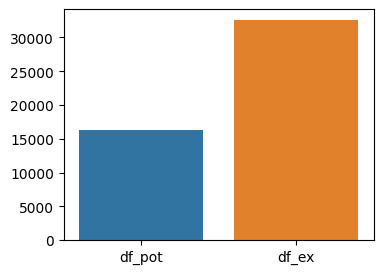

In [25]:
sns.barplot(x=['df_pot', 'df_ex'], y=[len(df_pot), len(df_ex)]);

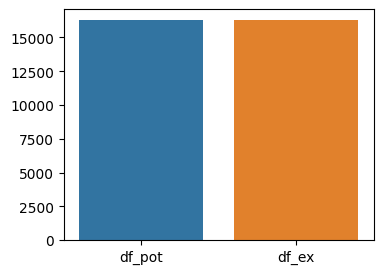

In [26]:
df_ex = resample(df_ex, n_samples=len(df_pot), replace=False, random_state=42)
sns.barplot(x=['df_pot', 'df_ex'], y=[len(df_pot), len(df_ex)]);

In [27]:
df_compare = pd.concat([df_pot.assign(dataset="potential"), df_ex.assign(dataset="existing")])

In [28]:
df_compare

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dataset,class
0,Row0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,potential,NaN
1,Row1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,potential,NaN
2,Row2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,potential,NaN
3,Row3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,potential,NaN
4,Row4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,potential,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19817,Row19817,52,Self-emp-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,existing,>50K
4342,Row4342,18,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,existing,<=50K
758,Row758,46,Federal-gov,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,existing,>50K
18267,Row18267,35,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,3908,0,27,United-States,existing,<=50K


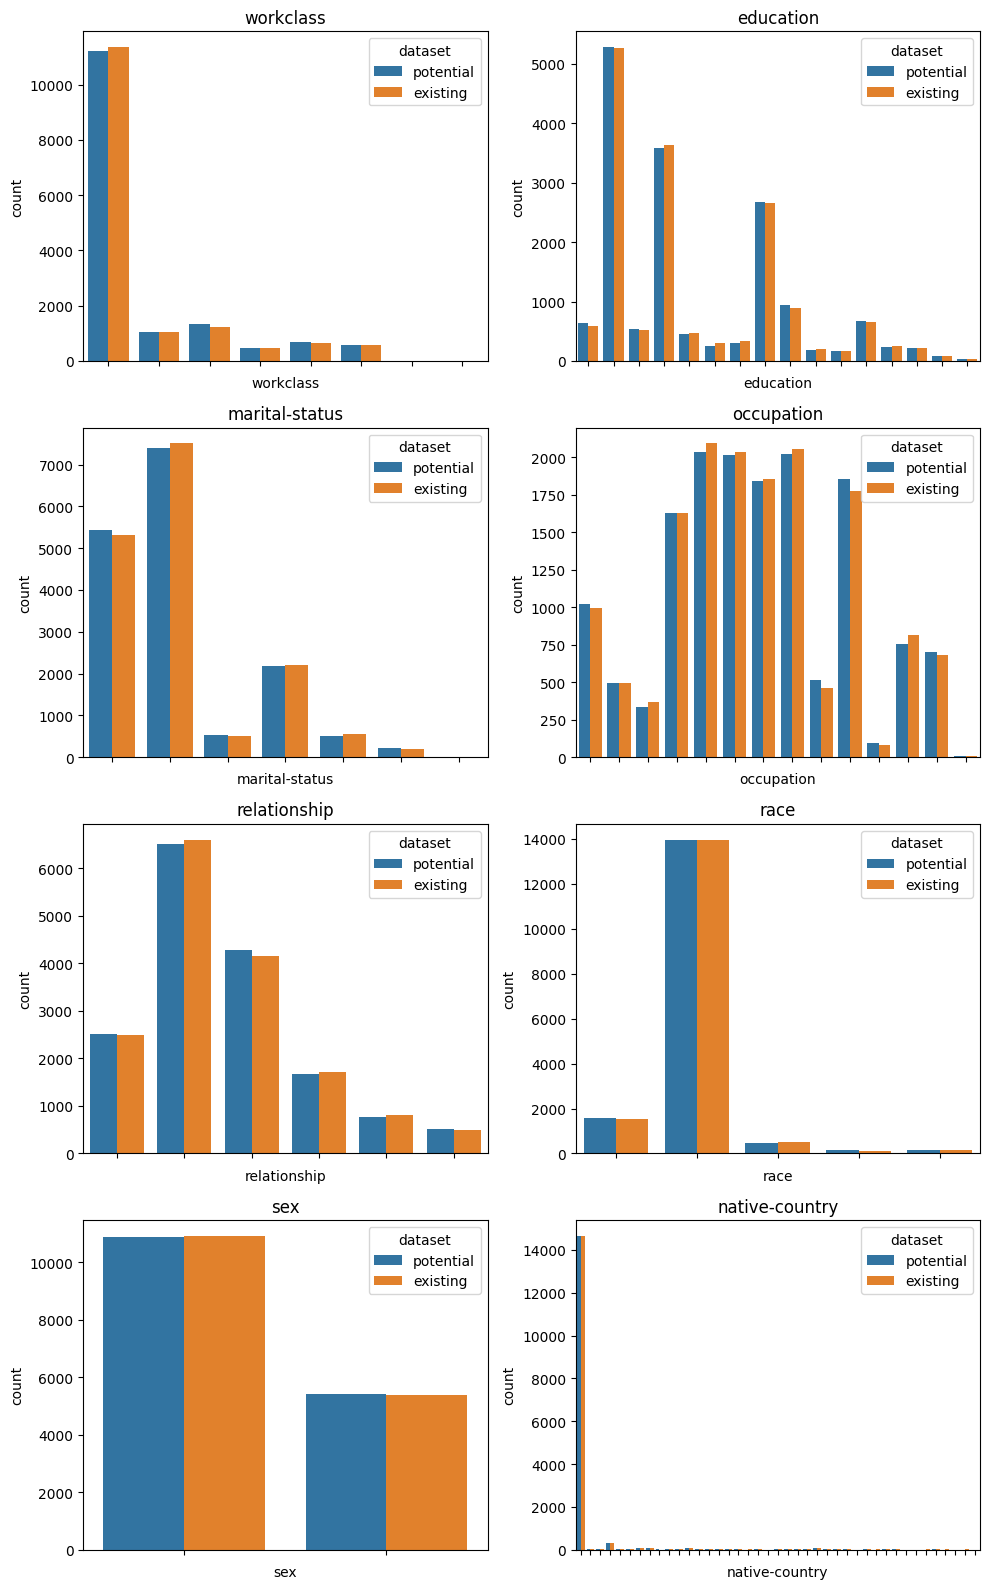

In [45]:
attributes = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]

ncols = 2
nrows = (len(attributes) + 1) // 2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))

for i, attribute in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.countplot(data=df_compare, x=attribute, hue="dataset", ax=axs[row][col])
    axs[row][col].set_title(attribute)
    axs[row][col].set_xticklabels([])


fig.tight_layout()

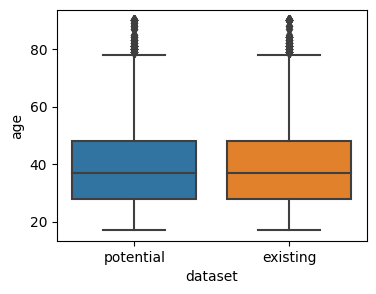

In [53]:
sns.boxplot(x='dataset', y='age', data=df_compare);

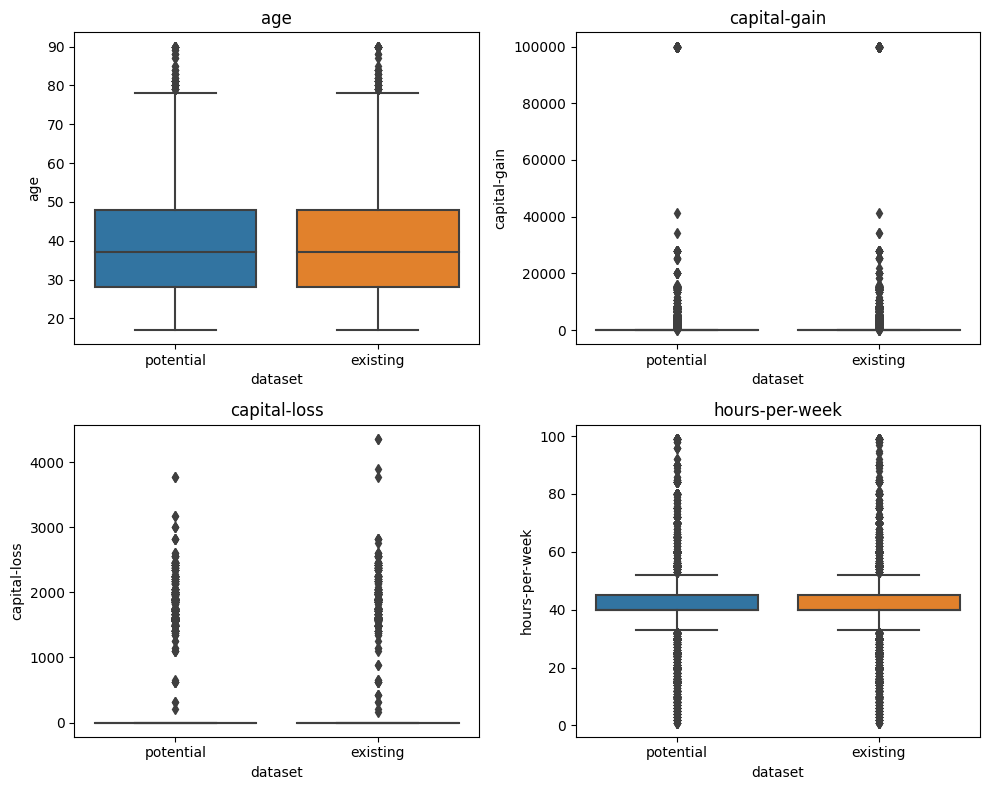

In [55]:
attributes = [
    'age',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

ncols = 2
nrows = (len(attributes) + 1) // 2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))

for i, attribute in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_compare, x='dataset', y=attribute, ax=axs[row][col])
    axs[row][col].set_title(attribute)


fig.tight_layout()